In [5]:
library(tidyverse)
library(ggplot2)
library(gapminder)
library(socviz)
library(ggsci)
library("gridExtra")
library(stringr)
library(scales)
library("ggrepel")
library(cowplot)
library(gg.gap)
options(warn=-1)

### Figure 2B
Adding expressions to facet labeller in ggplot 2 2.0 
https://stackoverflow.com/questions/34979931/adding-expressions-to-facet-labeller-in-ggplot-2-2-0

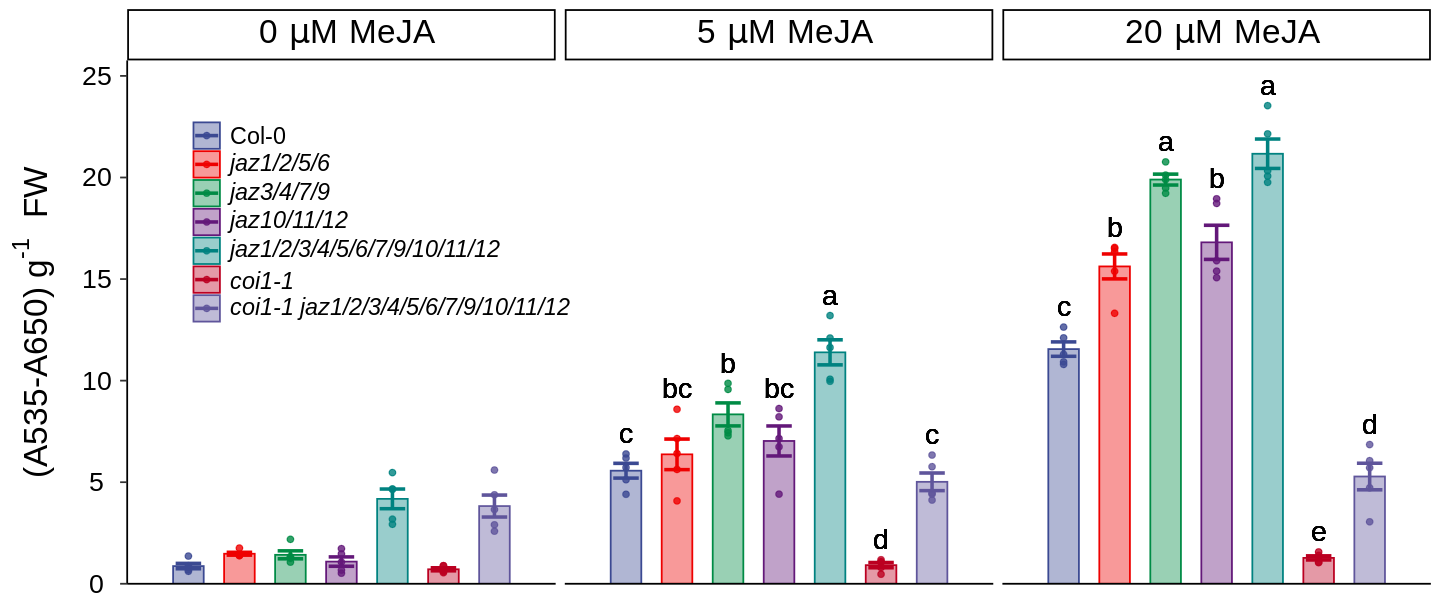

In [6]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/2B.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(3:7)],1,max) + 1
# df$sig[df$sig==""] = " "
# df$max[df$genotype=="Control" & df$luc=="GL2pro-LUC"] = 0.06

# transformat df
df_long <- gather(df, replicate, value, R1:R5)
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "jaz1/2/5/6",
                                                      "jaz3/4/7/9",
                                                      "jaz10/11/12",
                                                      "jaz1/2/3/4/5/6/7/9/10/11/12",
                                                      "coi1-1",
                                                      "coi1-1 jaz1/2/3/4/5/6/7/9/10/11/12"))

# df_long$treatment <- factor(df_long$treatment, level=c("0 uM MeJA",
#                                                         "5 uM MeJA",
#                                                         "20 uM MeJA"))

df_long$treatment <- factor(df_long$treatment, levels=c("0 uM MeJA",
                                                  "5 uM MeJA",
                                                  "20 uM MeJA"),
                                                  labels=c('{}~0~mu*M~MeJA',
                                                           '{}~5~mu*M~MeJA',
                                                           '{}~20~mu*M~MeJA'))


# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(0.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
              axis.ticks.x = element_blank(),
              axis.text.x = element_blank(),
#               axis.text.x = element_text(size=16, angle=0, color="black", margin = margin(t = 10, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_text(size=20, color="black", face="italic"),
              legend.title = element_blank(),
              legend.position = c(0.2,0.7),
#               legend.position = "bottom",
              legend.justification = "center",
              legend.text = element_text(size = 14),
              legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 12, repr.plot.height = 5)

# strip_labs <- c(expression(paste("0 ",alpha,"M MeJA")),
#                expression(paste("5 ",mu,"M MeJA")),
#                expression(paste("20 ",mu,"M MeJA")))

# names(strip_labs) <- c("0 uM MeJA",
#                       "5 uM MeJA",
#                       "20 uM MeJA")

p <- ggplot(df_long, aes(treatment,value, fill=genotype, color=genotype))

B2 <- p + stat_summary(fun="mean", 
                 geom="col", 
                 position = position_dodge(1),
                 width = 0.6,
                 alpha=0.4) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 position = position_dodge(width=1),
                 width = 0.5,                 
#                  position=position_dodge2(width=0.5,padding=0.5),
                 size=1) +
    geom_jitter(alpha=0.8, 
                position = position_dodge(1)
#                 position = position_jitterdodge(jitter.width=0.1, dodge.width=0.9)
               ) +
    theme_custom() +
    scale_fill_aaas(labels=expression("Col-0",
                                      italic("jaz1/2/5/6"),
                                      italic("jaz3/4/7/9"),
                                      italic("jaz10/11/12"),
                                      italic("jaz1/2/3/4/5/6/7/9/10/11/12"),
                                      italic("coi1-1"),
                                      italic("coi1-1 jaz1/2/3/4/5/6/7/9/10/11/12")),
                    guide=guide_legend(ncol=1)) +
    scale_color_aaas(labels=expression("Col-0",
                                      italic("jaz1/2/5/6"),
                                      italic("jaz3/4/7/9"),
                                      italic("jaz10/11/12"),
                                      italic("jaz1/2/3/4/5/6/7/9/10/11/12"),
                                      italic("coi1-1"),
                                      italic("coi1-1 jaz1/2/3/4/5/6/7/9/10/11/12"))) + 
    facet_grid( ~ treatment, scales="free_x",
               labeller = labeller(treatment = label_parsed)) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05))) +
    ylab(quote("(A535-A650) g" ^ "-1" ~ " FW")) +
    geom_text(aes(label= sig, y= max),
              size=6,
              color="black",
              position = position_dodge(1), 
              check_overlap=FALSE, 
              show.legend=FALSE)
B2

## Fiugure 2C

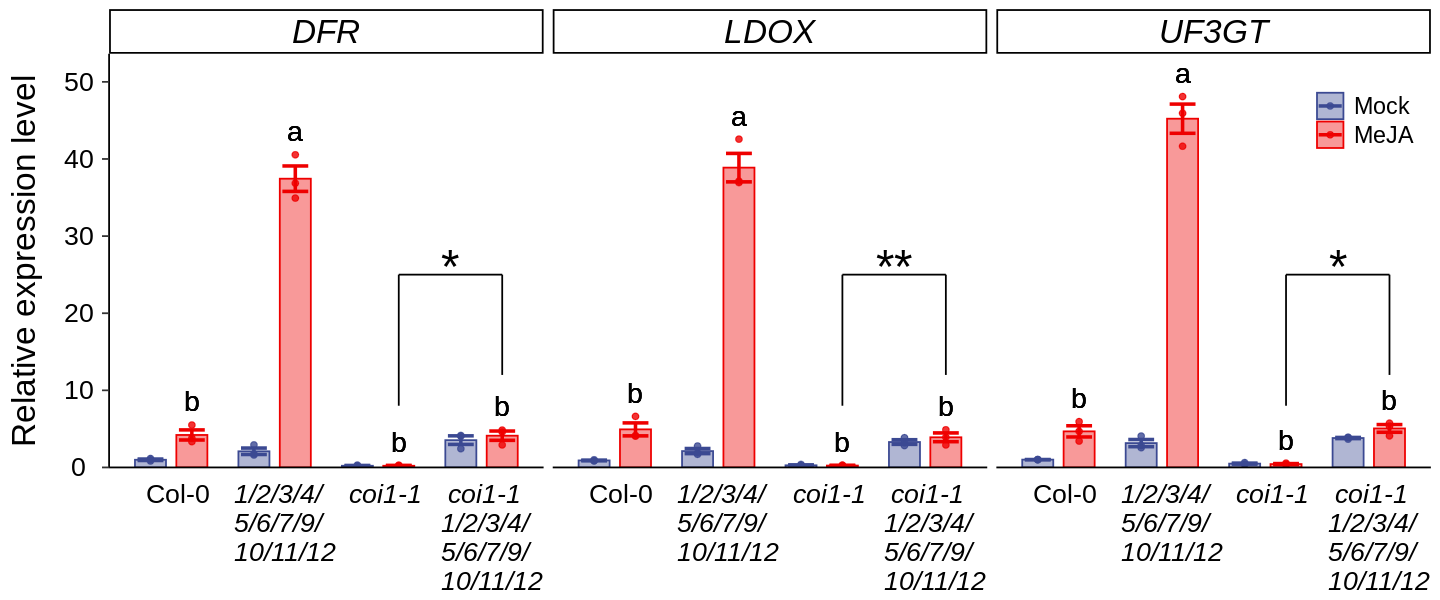

In [7]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/2C.csv",
                header=TRUE,
                stringsAsFactors=TRUE)
# set df for sig note
df$max <- apply(df[,c(5:7)],1,max) + 3

df_long <- gather(df, replicate, value, R1:R3)

df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "jaz1/2/3/4/5/6/7/9/10/11/12",
                                                      "coi1-1",
                                                      "coi1-1 jaz1/2/3/4/5/6/7/9/10/11/12"))

df_long$treatment <- factor(df_long$treatment, level=c("Mock",
                                                       "MeJA"))

# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(0.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
              axis.ticks.x = element_blank(),
              axis.text.x = element_text(size=16, 
                                         angle=0, 
                                         color="black",
                                         hjust=0.4,
                                         vjust=0,
                                         margin = margin(t = 55, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_text(size=20, color="black", face="italic"),
              legend.title = element_blank(),
              legend.position = c(0.95,0.85),
#               legend.position = "bottom",
              legend.justification = "center",
              legend.text = element_text(size = 14),
              legend.text.align = 0
             )
}

# create X tick labels
xtick_labs <- c("Col-0\n\n\n",
               expression(italic("1/2/3/4/\n5/6/7/9/\n10/11/12\n")),
               expression(italic("coi1-1\n\n\n")),
               expression(italic(" coi1-1\n1/2/3/4/\n5/6/7/9/\n10/11/12")))

# create anno df
anno <- data.frame(xstar = c(3.7, 3.7, 3.7), ystar = c(26, 26, 26),
                   lab = c("*","**", "*"),
                   gene = c("DFR","LDOX", "UF3GT"),
                   treatment=c("Mock","Mock","Mock"))

# set figure siz4.
options(repr.plot.width = 12, repr.plot.height = 5)


p <- ggplot(df_long, aes(genotype,value, fill=treatment, color=treatment)) 
C2 <- p + stat_summary(fun="mean", 
                 geom="bar", 
                 position = position_dodge(0.8),
#                  position = "dodge",
                 width=0.6,
                 alpha=0.4) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 position = position_dodge(width=0.8),
                 width = 0.5,                 
#                  position=position_dodge2(width=0.5,padding=0.5),
                 size=1) + 
    geom_jitter(alpha=0.8, 
                position = position_dodge(0.8)) +
    geom_text(data = anno, 
              size = 10,
              color = "black",
              aes(x = xstar,  y = ystar, label = lab),
              show.legend=FALSE) +
    facet_grid(~ gene, scales="free_x") +
    theme_custom() +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05))) +
    ylab(quote("Relative expression level")) +
    scale_x_discrete(labels=xtick_labs) +
    scale_fill_aaas() +
    scale_color_aaas() +
    geom_text(aes(label= sig, y= max),
              size=6,
              color="black",
              position = position_dodge(0.8), 
              check_overlap=FALSE, 
              show.legend=FALSE) +
    annotate(geom = "line",
           x = c(3.2, 3.2),
           y = c(8, 25)) +
    annotate(geom = "line",
           x = c(4.2, 4.2),
           y = c(12, 25)) +
    annotate(geom = "line",
           x = c(3.2, 4.2),
           y = c(25, 25)) 
C2

## Figure 2E v2

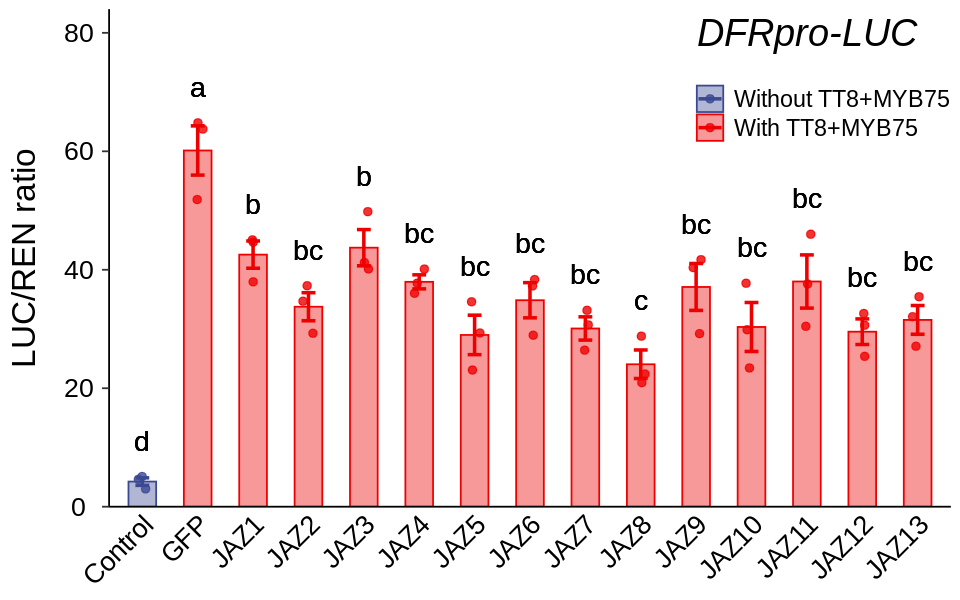

In [8]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/2E.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(4:6)],1,max) + 6

# transformat df
df_long <- gather(df, replicate, value, R1:R3)
df_long$genotype <- factor(df_long$genotype, levels=c("Control","GFP",
                                                      "JAZ1","JAZ2","JAZ3","JAZ4","JAZ5",
                                                      "JAZ6","JAZ7","JAZ8","JAZ9","JAZ10",
                                                      "JAZ11","JAZ12","JAZ13"))
df_long$treatment <- factor(df_long$treatment, levels=c("Without TT8+MYB75",
                                                        "With TT8+MYB75"))
# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
              axis.ticks.x = element_blank(),
#               axis.text.x = element_blank(),
              axis.text.x = element_text(size=16, angle=45, color="black", 
                                         vjust=1,hjust=1,
                                         margin = margin(t = 0, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_text(size=20, face="italic"),
              legend.title = element_blank(),
              legend.position = c(0.85,0.8),
              legend.justification = "center",
              legend.text = element_text(size = 14),
              legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 8, repr.plot.height = 5)

p <- ggplot(df_long, aes(genotype, value, fill=treatment, color=treatment))

E2 <- p + stat_summary(fun="mean", 
                 geom="col", 
                 width=0.5,
                 position = position_dodge(1),
                 alpha=0.4) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 position = position_dodge(width=1),
                 width = 0.25,                 
                 size=1) +
    geom_jitter(alpha=0.8, 
                size=2,
                width=0.1) +
    theme_custom() +
    ylab(quote("LUC/REN ratio")) +
    scale_fill_aaas() +
    scale_color_aaas() + 
#     facet_wrap(~ luc, 
#                nrow=2, 
#                scales="free_y") +
    geom_text(aes(label= sig, y= max),
              size=6,
              color="black",
              position = position_dodge(1), 
              check_overlap = FALSE, 
              show.legend=FALSE) +
    scale_y_continuous(breaks=c(0, 20, 40, 60, 80), 
                       limits=c(0, 80),
                       expand = expansion(mult = c(0, 0.05))) +
    annotate(geom = "text",
             x = 13, y = 80,
             size = 8,
             fontface="italic",
             label = "DFRpro-LUC")
E2

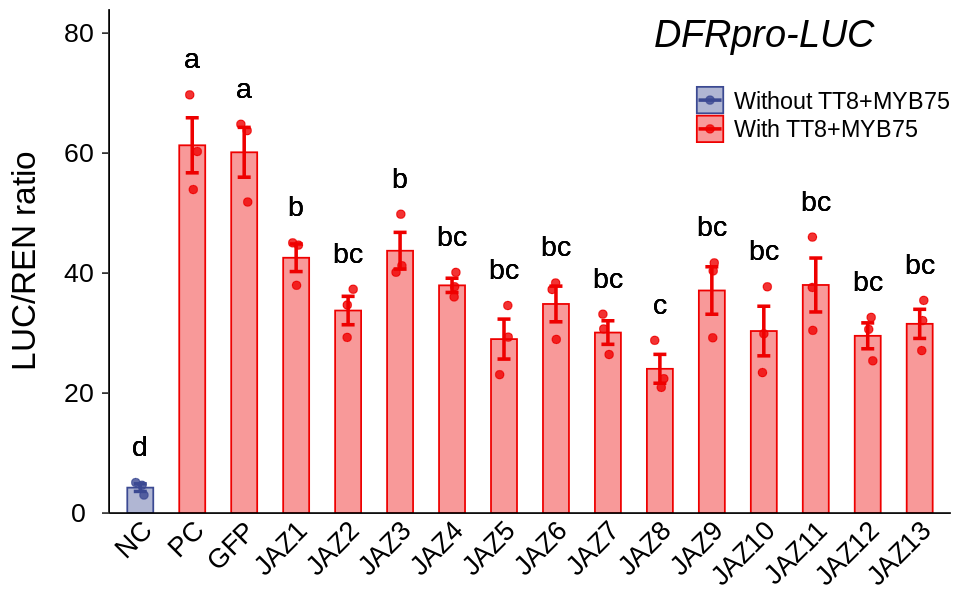

In [9]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/02.V2_data/2e.tab",
                header=TRUE,
               sep="\t",
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(4:6)],1,max) + 6

# transformat df
df_long <- gather(df, replicate, value, R1:R3)
df_long$genotype <- factor(df_long$genotype, levels=c("NC","PC","GFP",
                                                      "JAZ1","JAZ2","JAZ3","JAZ4","JAZ5",
                                                      "JAZ6","JAZ7","JAZ8","JAZ9","JAZ10",
                                                      "JAZ11","JAZ12","JAZ13"))
df_long$treatment <- factor(df_long$treatment, levels=c("Without TT8+MYB75",
                                                        "With TT8+MYB75"))
# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
              axis.ticks.x = element_blank(),
#               axis.text.x = element_blank(),
              axis.text.x = element_text(size=16, angle=45, color="black", 
                                         vjust=1,hjust=1,
                                         margin = margin(t = 0, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_text(size=20, face="italic"),
              legend.title = element_blank(),
              legend.position = c(0.85,0.8),
              legend.justification = "center",
              legend.text = element_text(size = 14),
              legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 8, repr.plot.height = 5)

p <- ggplot(df_long, aes(genotype, value, fill=treatment, color=treatment))

E2 <- p + stat_summary(fun="mean", 
                 geom="col", 
                 width=0.5,
                 position = position_dodge(1),
                 alpha=0.4) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 position = position_dodge(width=1),
                 width = 0.25,                 
                 size=1) +
    geom_jitter(alpha=0.8, 
                size=2,
                width=0.1) +
    theme_custom() +
    ylab(quote("LUC/REN ratio")) +
    scale_fill_aaas() +
    scale_color_aaas() + 
#     facet_wrap(~ luc, 
#                nrow=2, 
#                scales="free_y") +
    geom_text(aes(label= sig, y= max),
              size=6,
              color="black",
              position = position_dodge(1), 
              check_overlap = FALSE, 
              show.legend=FALSE) +
    scale_y_continuous(breaks=c(0, 20, 40, 60, 80), 
                       limits=c(0, 80),
                       expand = expansion(mult = c(0, 0.05))) +
    annotate(geom = "text",
             x = 13, y = 80,
             size = 8,
             fontface="italic",
             label = "DFRpro-LUC")
E2

## Combination

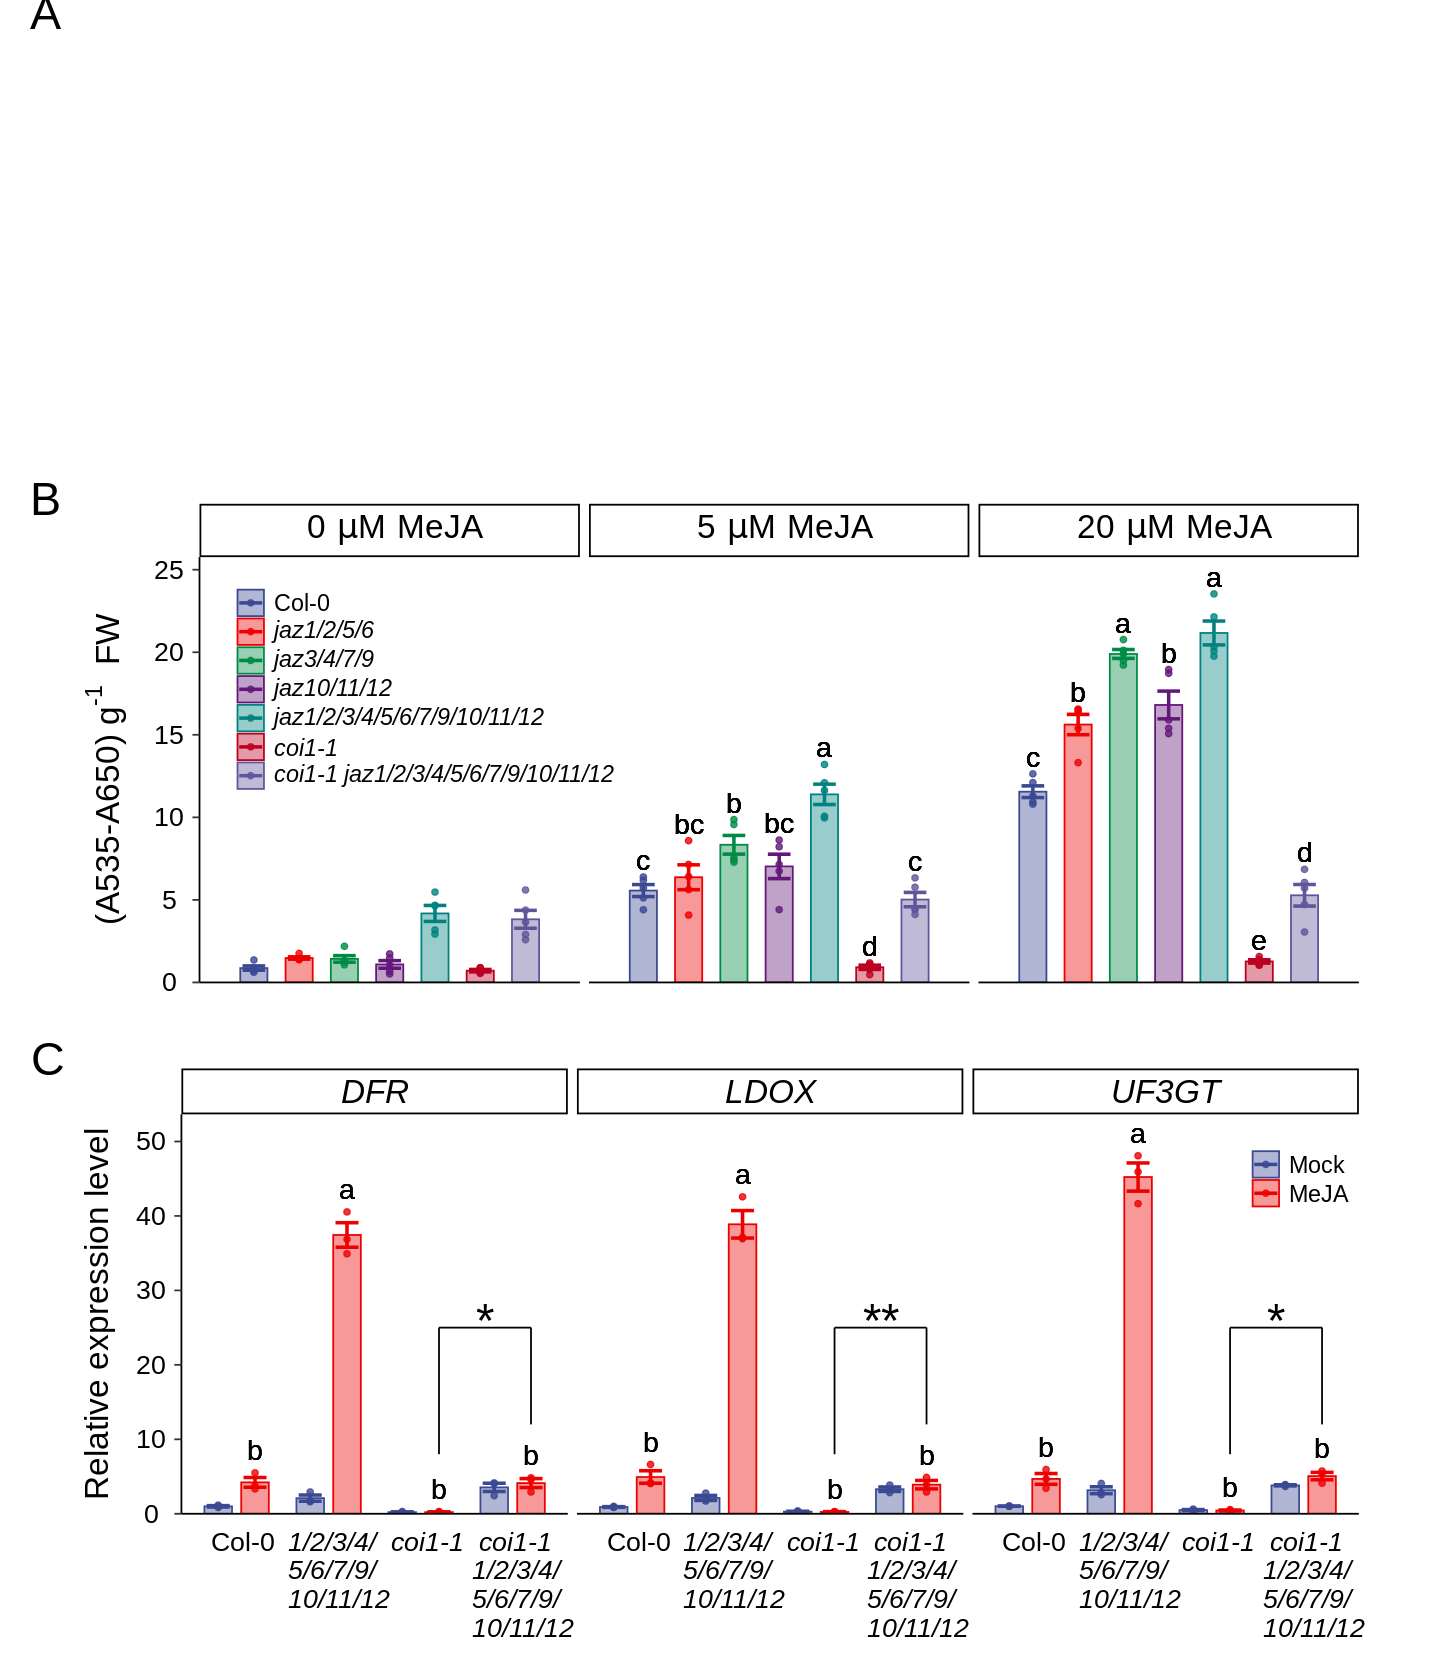

In [15]:
options(repr.plot.width = 12, repr.plot.height = 14)
fig2_p1 <- plot_grid(NULL,B2,C2,
          ncol=1,
          rel_heights=c(1,1.2,1.4),
          labels = c('A','B','C'),
          label_colour = 'black',
          label_x = 0.01,
          label_y = 1,
          label_fontface = 1,
          label_size = 28,
                    scale=0.9)
fig2_p1

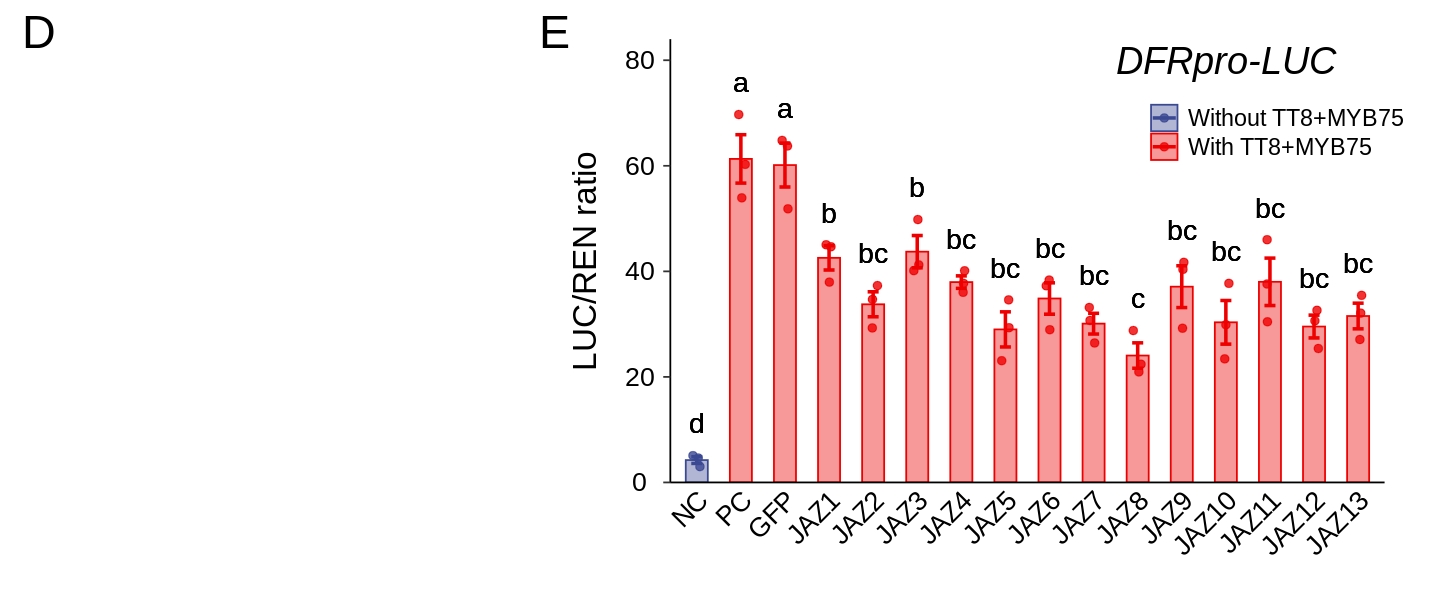

In [16]:
options(repr.plot.width = 12, repr.plot.height = 5)
fig2_p2 <- plot_grid(NULL,E2,
          ncol=2,
          rel_widths = c(1, 1.8),
          labels = c('D','E'),
          label_colour = 'black',
          label_x = 0.01,
          label_y = 1,
          label_fontface = 1,
          label_size = 28,
                    scale=0.9)
fig2_p2

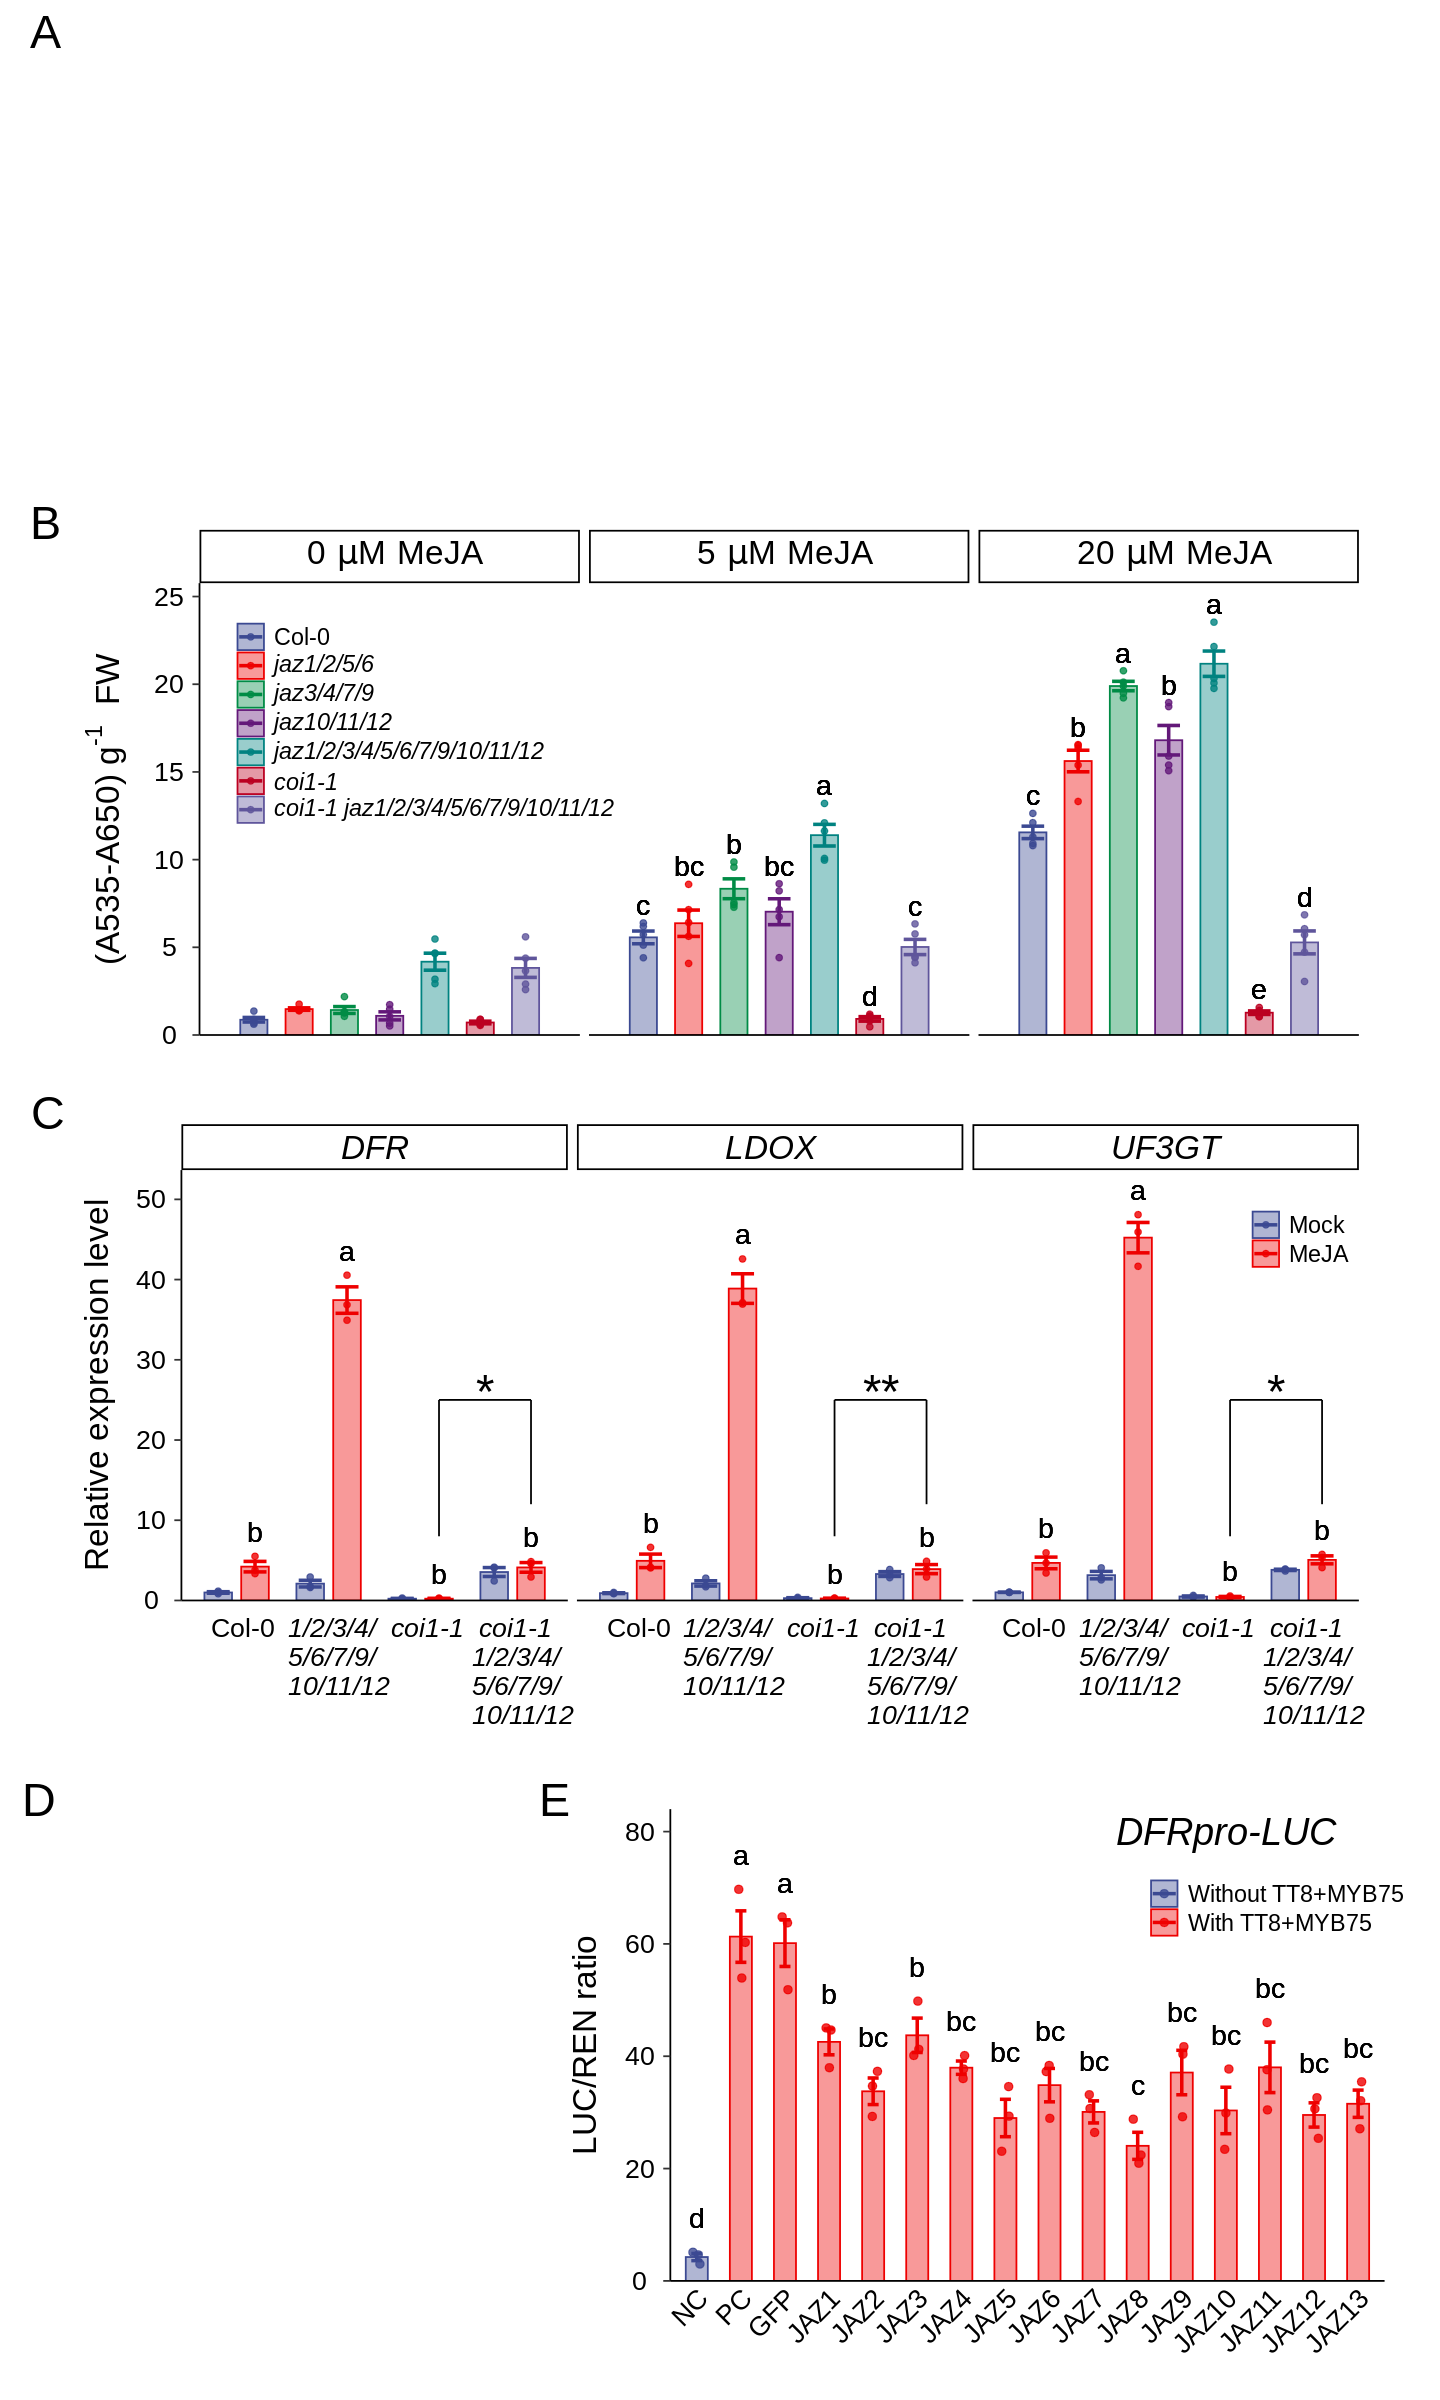

In [18]:
options(repr.plot.width = 12, repr.plot.height = 20)
fig2 <- plot_grid(fig2_p1, fig2_p2,
          rel_heights = c(14,5),
          ncol=1)
fig2
ggsave2("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/02.V2_data/Figure2_v2.png",
      fig2, height=19, width=12, dpi=300)